# Using Time Series to Model Spotify Streaming Data

### [Data_Prep](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Data-Preparation)
### [Plotting TS](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Plotting-Time-Series-Data)
### [Plotting #1 Song Streams](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Plotting-#-of-Streams-for-#1-Song-for-different-Regions)
### [Creating Stationary TS Data](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Creating-Stationary-TimeSeries-Data)
### [Seasonal Decompostion](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Using-Seasonal-Decomposition-to-Increase-Stationariness-of-Data)
### [ARIMA](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#ARIMA-models)
### [Conclusions & Future Directions](http://localhost:8888/notebooks/Spotify_Time_Series.ipynb#Conclusions-&-Future-Directions)
##### Refrences
* https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
plt.style.use('ggplot')
%matplotlib inline

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# function to create bigger fonts
def bigger_fonts(ax):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

# Data Preparation

In [4]:
#Read in spotify data
spotify_df = pd.read_csv('../data/data.csv', infer_datetime_format=True, parse_dates=['Date'])

In [5]:
# create day of week and day column
spotify_df['day_of_week'] = spotify_df['Date'].dt.dayofweek
spotify_df['day'] = spotify_df['day_of_week'].map({0:'Monday',1:'Tuesday',\
                                                     2:'Wednesday',3:'Thursday',\
                                                     4:'Friday',5:'Saturday',6:'Sunday'})
spotify_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,day_of_week,day
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ar,6,Sunday
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ar,6,Sunday
2,3,Reggaetón Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ar,6,Sunday
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ar,6,Sunday
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ar,6,Sunday


In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017625 entries, 0 to 2017624
Data columns (total 9 columns):
Position       int64
Track Name     object
Artist         object
Streams        int64
URL            object
Date           datetime64[ns]
Region         object
day_of_week    int64
day            object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.5+ MB


In [7]:
spotify_df.describe()

,Position,Streams,day_of_week
count,2.017625e+06,2.017625e+06,2.017625e+06
mean,9.394797e+01,5.208577e+04,2.993814e+00
std,5.735935e+01,2.095484e+05,2.002716e+00
min,1.000000e+00,1.001000e+03,0.000000e+00
25%,4.400000e+01,3.189000e+03,1.000000e+00
50%,9.100000e+01,8.674000e+03,3.000000e+00
75%,1.420000e+02,2.814300e+04,5.000000e+00
max,2.000000e+02,1.138152e+07,6.000000e+00


In [8]:
# create df with songs that were #1 (top of the charts)
top_o_charts = spotify_df[spotify_df['Position'] == 1]
songs_that_topped = set((top_o_charts['Track Name'].tolist()))
print(songs_that_topped)
print(len(songs_that_topped))
region_charts = top_o_charts[['Date','Region','Streams','Artist','Track Name', 'day_of_week','day']].reset_index()
print(len(region_charts))
region_charts.head()

{nan, "It Ain't Me (with Selena Gomez)", 'Rica', 'Helt seriöst', 'Salam', 'Here With You', 'Θ. Macarena', "Say You Won't Let Go", 'Amar pelos Dois', 'Volare', 'Alleen', 'Despacito (Featuring Daddy Yankee)', 'Juna', 'Without You (feat. Sandro Cavazza)', 'Senza Pagare VS T-Pain', 'Habiba', '魚仔', 'New Rules', 'There for You', 'Rockabye (feat. Sean Paul & Anne-Marie)', 'Glorious (feat. Skylar Grey)', 'Ég Vil Það', 'Oh bah oui', 'De Snakker', 'Shape of You', 'Lapioin', 'Α. Nwaar Is The New Black', 'Starboy', 'Come Again', 'Neinei', 'Closer', 'Alone', 'Unforgettable', 'Gasell', 'Thunder', 'Hukutaan', 'Reggaetón Lento (Bailemos)', 'Soy Peor', 'Hula Hula', 'Réseaux', 'Mä hiihdän', 'OK', 'Ked Af Det', 'Sitä säät mitä tilaat (feat. Ellinoora)', 'Utro', 'Rahan takii', 'Akad', '2U (feat. Justin Bieber)', '4x Duurder', 'Vai Embrazando', 'Castle on the Hill', 'Chantaje', 'Sua Cara (feat. Anitta & Pabllo Vittar)', 'Geri Ekki Neitt (feat. Unnsteinn)', 'Otra Vez (feat. J Balvin)', 'Bank Account', 'Hey 

,index,Date,Region,Streams,Artist,Track Name,day_of_week,day
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday


In [9]:
# avg number of streams per day
avg_streams = spotify_df.groupby(['Region','Date'])['Region','Streams'].mean().reset_index()
avg_streams.rename(columns={'Streams':'avg_streams'}, inplace=True)
print(len(avg_streams))
avg_streams.head()

11854


,Region,Date,avg_streams
0,ar,2017-01-01,39444.360
1,ar,2017-01-02,30050.205
2,ar,2017-01-03,29609.535
3,ar,2017-01-04,30097.865
4,ar,2017-01-05,31118.230


In [10]:
# merging avg number of streams per day and top of the charts df
streaming_data = region_charts.merge(avg_streams, on=('Date', 'Region'), how='left')
streaming_data.rename(columns={'Streams':'Streams_#1_song'}, inplace=True)
streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
0,0,2017-01-01,ar,253019,Shakira,Chantaje,6,Sunday,39444.360
1,200,2017-01-02,ar,185399,Shakira,Chantaje,0,Monday,30050.205
2,400,2017-01-03,ar,183132,Shakira,Chantaje,1,Tuesday,29609.535
3,600,2017-01-04,ar,186926,Shakira,Chantaje,2,Wednesday,30097.865
4,800,2017-01-05,ar,191288,Shakira,Chantaje,3,Thursday,31118.230


# Plotting Time Series Data

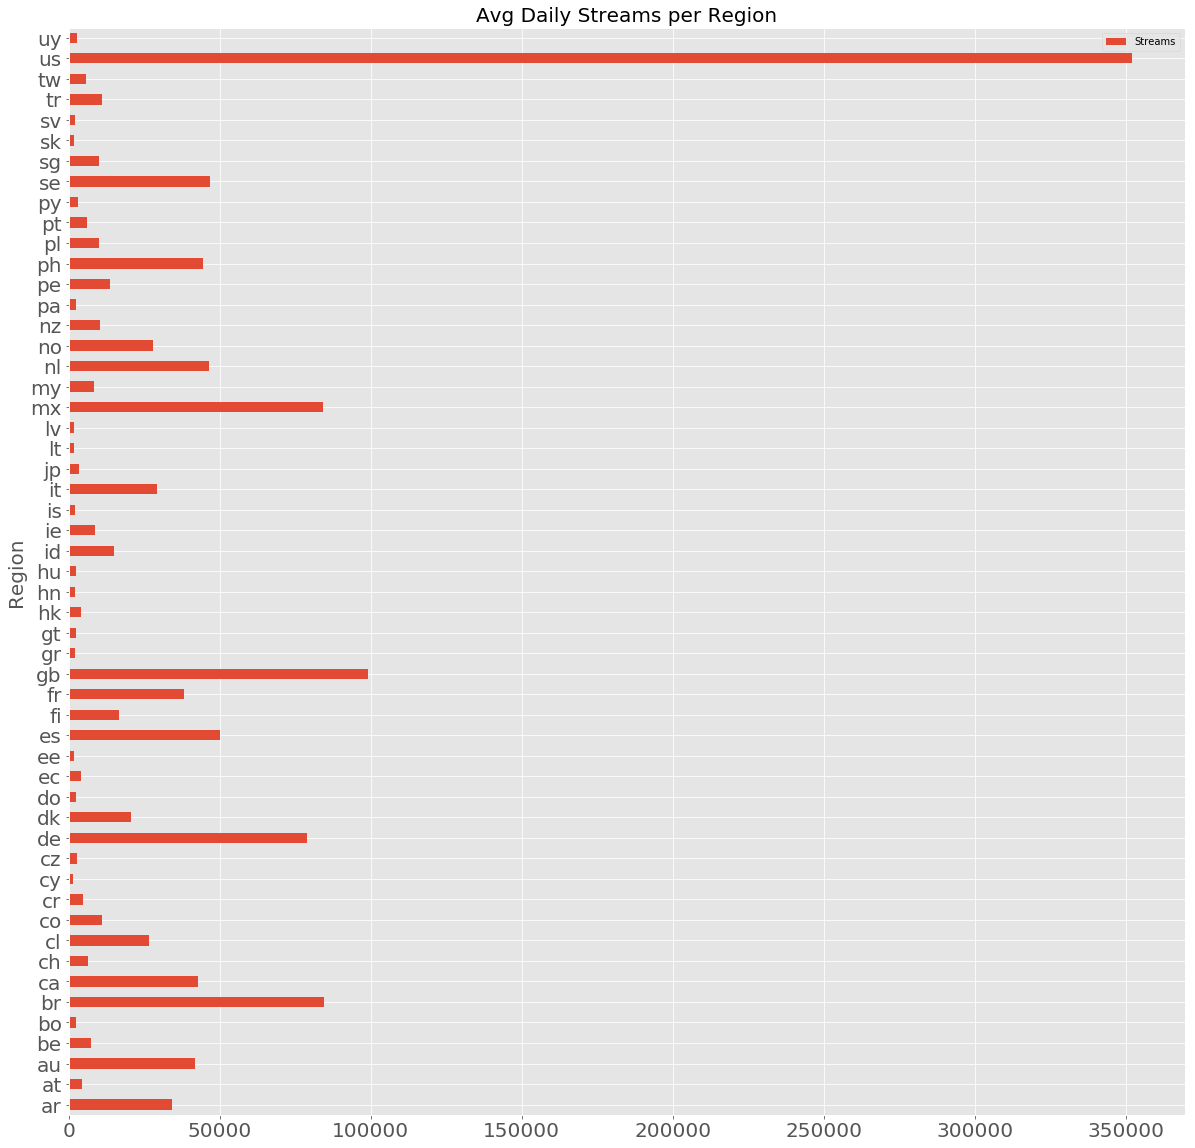

In [11]:
spotify_df_no_global = spotify_df[spotify_df['Region']!='global']
avg_region_streams = spotify_df_no_global.groupby('Region').mean().reset_index()
ax = avg_region_streams.plot.barh(x='Region', y=['Streams'],figsize=(20,20), title = 'Avg Daily Streams per Region')
bigger_fonts(ax)
plt.savefig('../images/Avg_Streams_per_Region.png')

In [12]:
# pulling global streaming data
global_streaming_data = streaming_data[streaming_data['Region'] == 'global']
global_streaming_data.head()

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


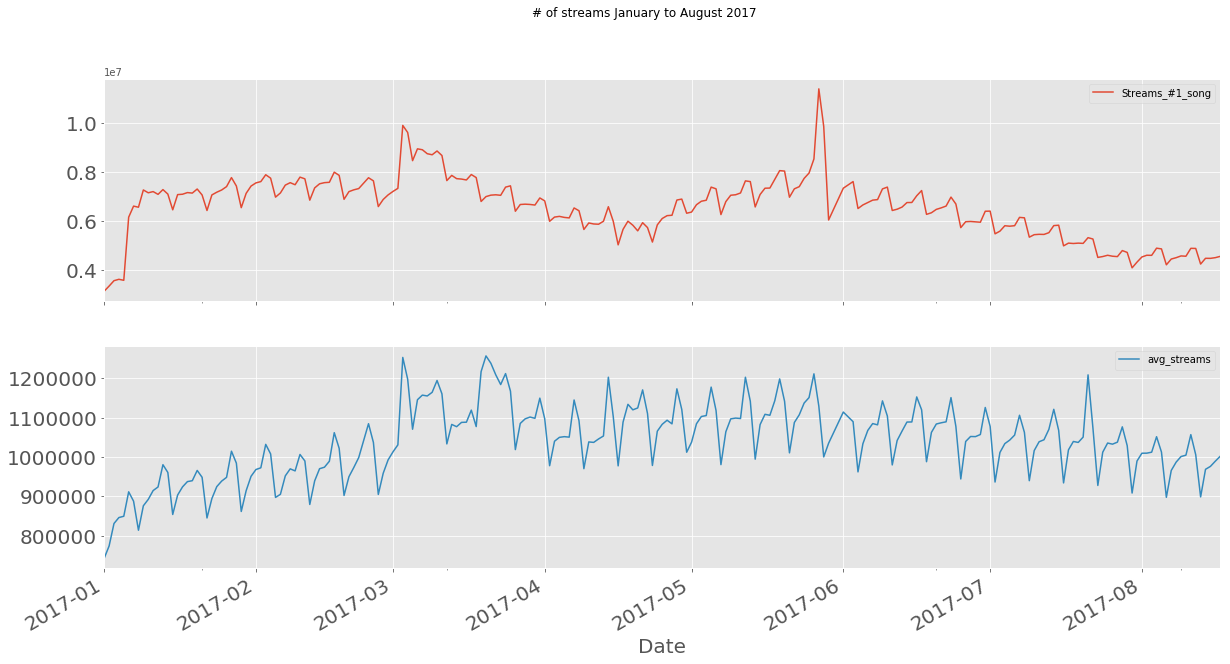

In [13]:
#Plotting streaming data
ax1, ax2 = global_streaming_data.plot(kind='line',x='Date', \
                                y=['Streams_#1_song', 'avg_streams'], figsize=(20,10),\
                                title='# of streams January to August 2017', subplots=True)
bigger_fonts(ax1)
bigger_fonts(ax2)
plt.savefig('../images/Jan_avg_streams_v.s_streams_#1_song.png')

In [14]:
#getting streaming data for Januray
jan_data = global_streaming_data[global_streaming_data['Date'] <= '2017-02-01']
jan_data.head(10)

,index,Date,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
4629,822764,2017-01-01,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
4630,822964,2017-01-02,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
4631,823164,2017-01-03,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
4632,823364,2017-01-04,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
4633,823564,2017-01-05,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470
4634,823764,2017-01-06,global,6151345,Ed Sheeran,Shape of You,4,Friday,911607.935
4635,823964,2017-01-07,global,6602494,Ed Sheeran,Shape of You,5,Saturday,887835.120
4636,824164,2017-01-08,global,6557531,Ed Sheeran,Shape of You,6,Sunday,814157.455
4637,824364,2017-01-09,global,7261007,Ed Sheeran,Shape of You,0,Monday,876179.295
4638,824564,2017-01-10,global,7145757,Ed Sheeran,Shape of You,1,Tuesday,892404.280


### Looks like # of Streams is cyclical based on Day of Week

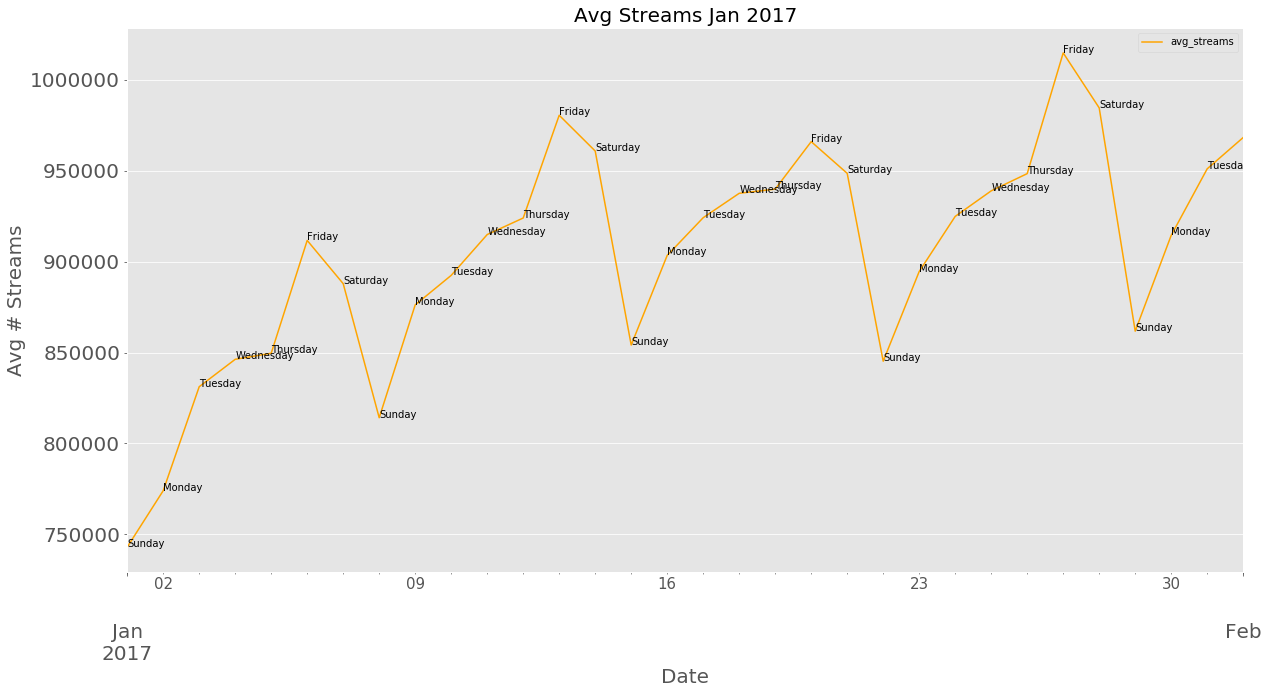

In [15]:
#plotting januray avg_streaming data
ax = jan_data.plot(kind='line',x='Date', y=['avg_streams'], \
                    figsize=(20,10), \
                    title='Avg Streams Jan 2017',\
                    color='orange', fontsize=15)
#increasing font size of plot
bigger_fonts(ax)

# Label points with day of week
date = jan_data['Date'].tolist()
avg_streams = jan_data['avg_streams'].tolist()
day = jan_data['day'].tolist()
for d, i, j in zip(day, date, avg_streams):
    ax.annotate(d, xy=(i,j),clip_on=True)
plt.ylabel('Avg # Streams')

#dataframe januray avg_streams
# global_streaming_data[['Date','avg_streams','day_of_week']]
plt.savefig('../images/Avg_Streaming_Jan_2017.png')

## Streaming increases everyday of the week peaking on Friday and drops significantly on Sundays

,day_of_week,day,Streams
0,0,Monday,51114.237236
1,1,Tuesday,51762.966347
2,2,Wednesday,52362.444005
3,3,Thursday,51800.786690
4,4,Friday,55138.074701
5,5,Saturday,53917.110096
6,6,Sunday,48609.954158


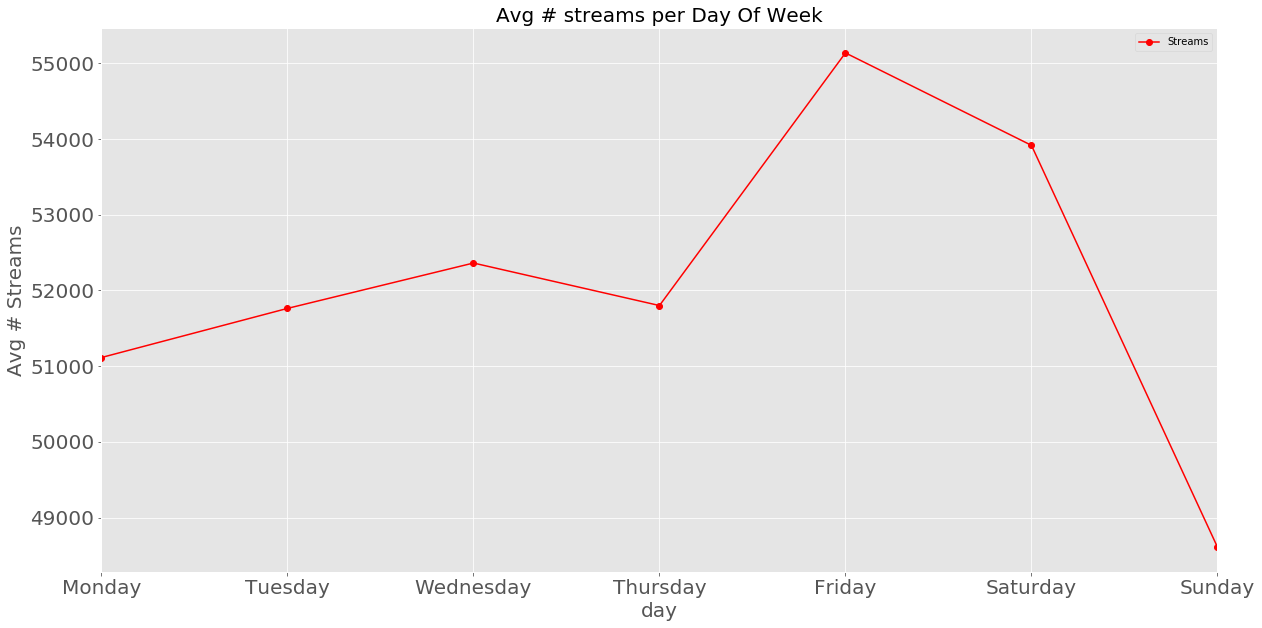

In [16]:
dow = spotify_df.groupby(['day_of_week','day']).mean()['Streams'].reset_index()

#plotting avg_streams per day of week
ax = dow.plot(x='day', y='Streams', figsize=(20,10), marker='o',title='Avg # streams per Day Of Week', color='red')
plt.ylabel('Avg # Streams')
bigger_fonts(ax)
plt.savefig('../images/Avg_Streaming_Day_of_Week.png')
dow

# Plotting # of Streams for #1 Song for different Regions

In [17]:
#Plotting top streams colored by #1 trackname
def plot_1_song(df, title):
    fig, ax = plt.subplots(1)
    for track in set(df['Track Name'].tolist()):
        df[df['Track Name'] == track].plot(ax=ax, x='Date', \
                                                y=['Streams_#1_song'], figsize=(20,15),\
                                                title=title,\
                                                color=np.random.rand(3,1).T)
        plt.ylabel('Total # Streams')
        plt.legend(set(df['Track Name'].tolist()))
        bigger_fonts(ax)

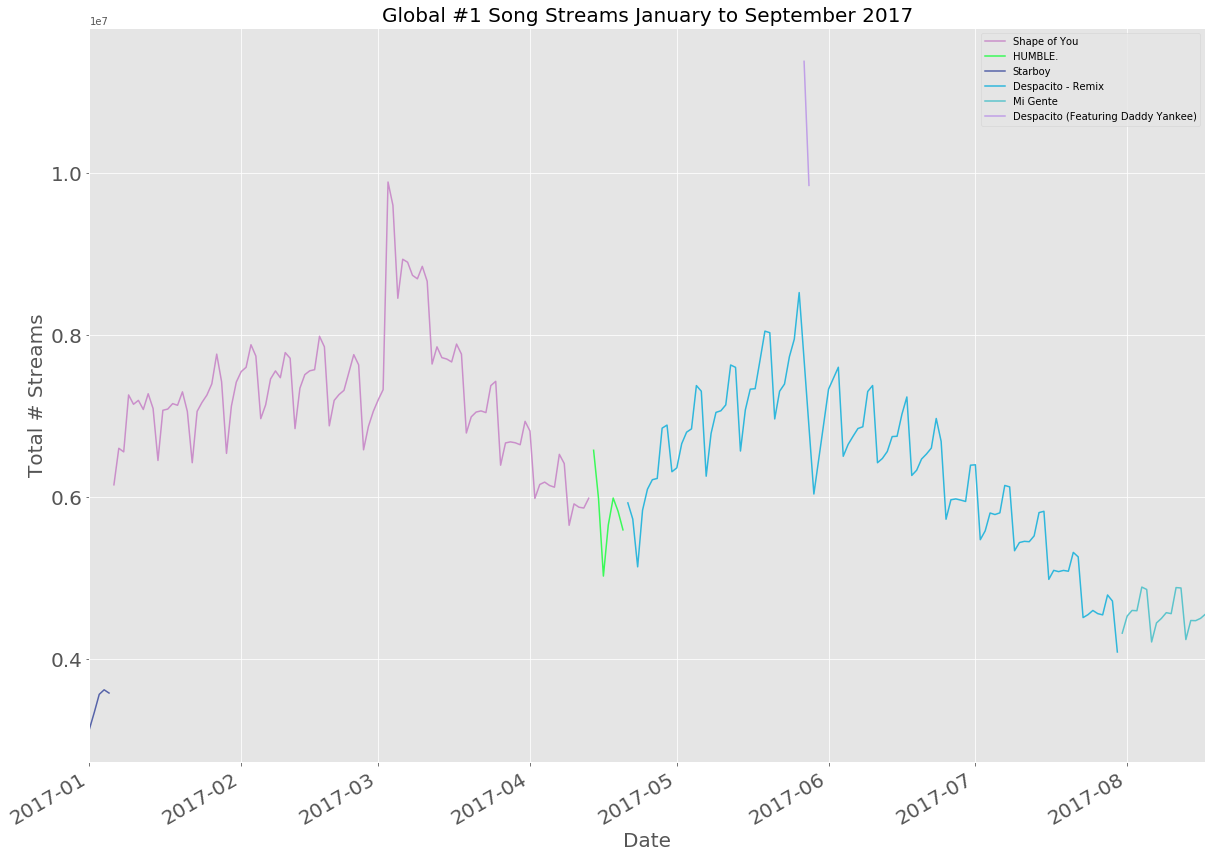

In [18]:
plot_1_song(global_streaming_data, 'Global #1 Song Streams January to September 2017')
plt.savefig('../images/Global_#1_Song_Streams_January_to_September_2017.png')

In [19]:
streaming_data.to_json('/Users/gmgtex/Documents/My Tableau Repository/DataSources/spotify_streaming.json')

In [20]:
def get_me_this_region(df, column_name, region_name):
    return df[df[column_name]==region_name]

In [21]:
us_data = get_me_this_region(streaming_data, 'Region', 'us')

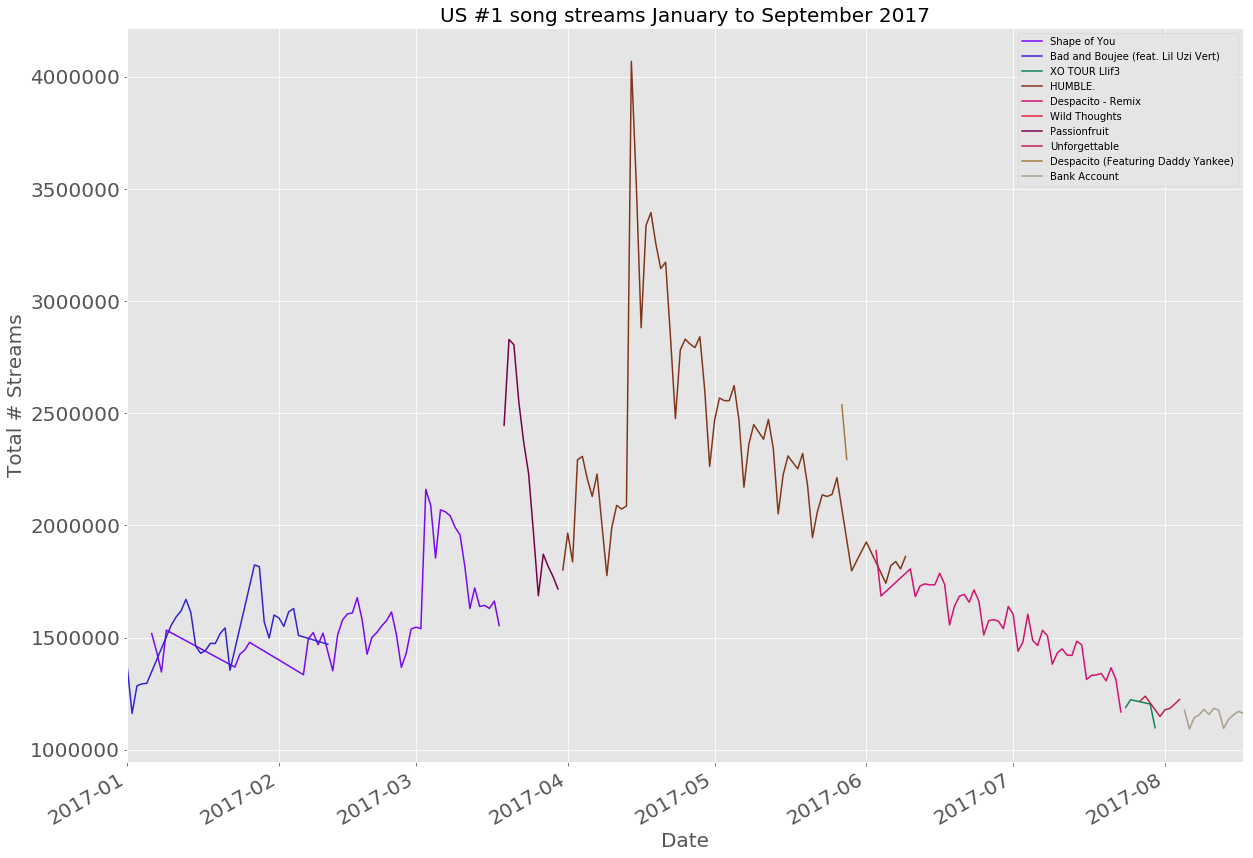

In [22]:
plot_1_song(us_data, 'US #1 song streams January to September 2017')
plt.savefig('../images/US_#1_Song_Streams_January_to_September_2017.png')

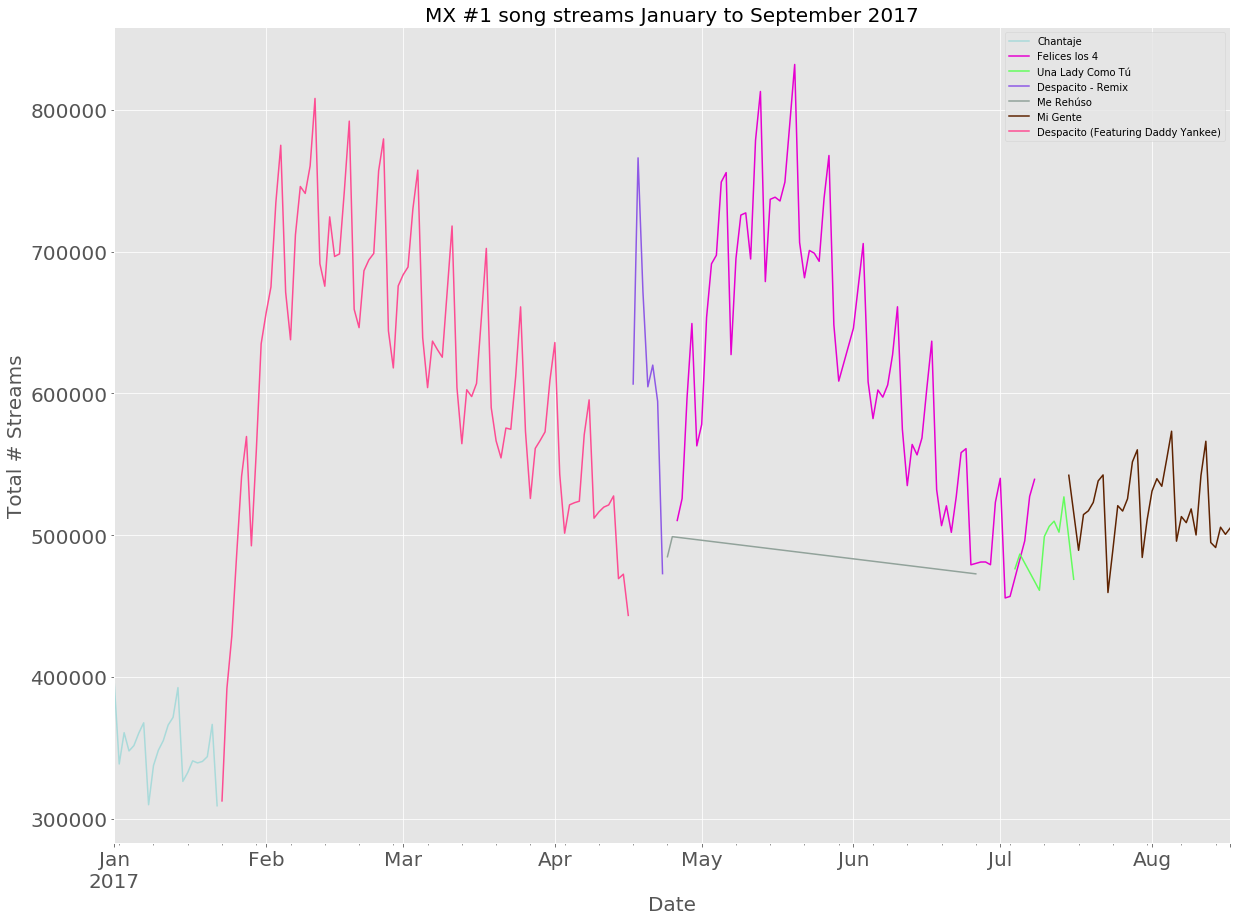

In [23]:
mx_data = get_me_this_region(streaming_data, 'Region', 'mx')
plot_1_song(mx_data, 'MX #1 song streams January to September 2017')

# Creating Stationary TimeSeries Data

In [24]:
timeseries_data = global_streaming_data.set_index('Date')
timeseries_data.head()

,index,Region,Streams_#1_song,Artist,Track Name,day_of_week,day,avg_streams
Date,,,,,,,,
2017-01-01,822764,global,3135625,The Weeknd,Starboy,6,Sunday,743065.835
2017-01-02,822964,global,3342769,The Weeknd,Starboy,0,Monday,774054.180
2017-01-03,823164,global,3563076,The Weeknd,Starboy,1,Tuesday,831199.650
2017-01-04,823364,global,3619247,The Weeknd,Starboy,2,Wednesday,846262.535
2017-01-05,823564,global,3579206,The Weeknd,Starboy,3,Thursday,849595.470


In [25]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, std=True):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    fig, ax = plt.subplots()
    orig = ax.plot(timeseries, color='orange',label='Original')
    mean = ax.plot(rolmean, color='black', label='Rolling Mean')
    if std:
        std = ax.plot(rolstd, color='red', label = 'Rolling Std')
    fig.set_size_inches((20,10))
    plt.xlabel('Date')
    plt.ylabel('Log Avg # Streams')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    bigger_fonts(ax)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return rolmean

## Avg Streams

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


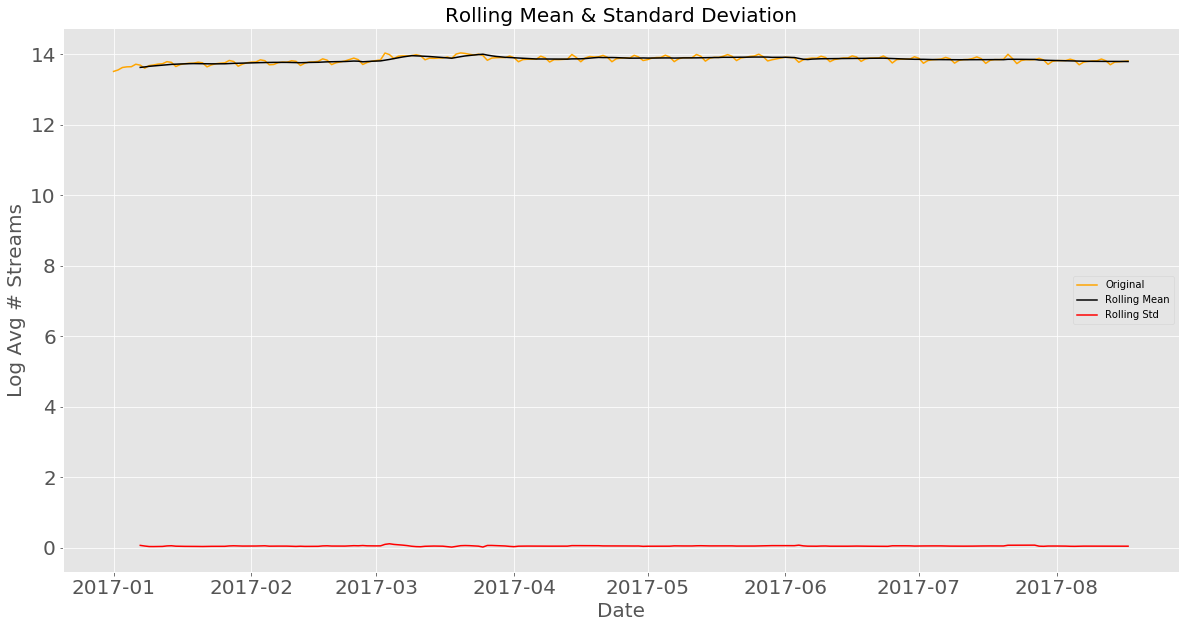

In [26]:
avg_streams_log = np.log(timeseries_data['avg_streams'])
avg_streams_rolmean = test_stationarity(avg_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


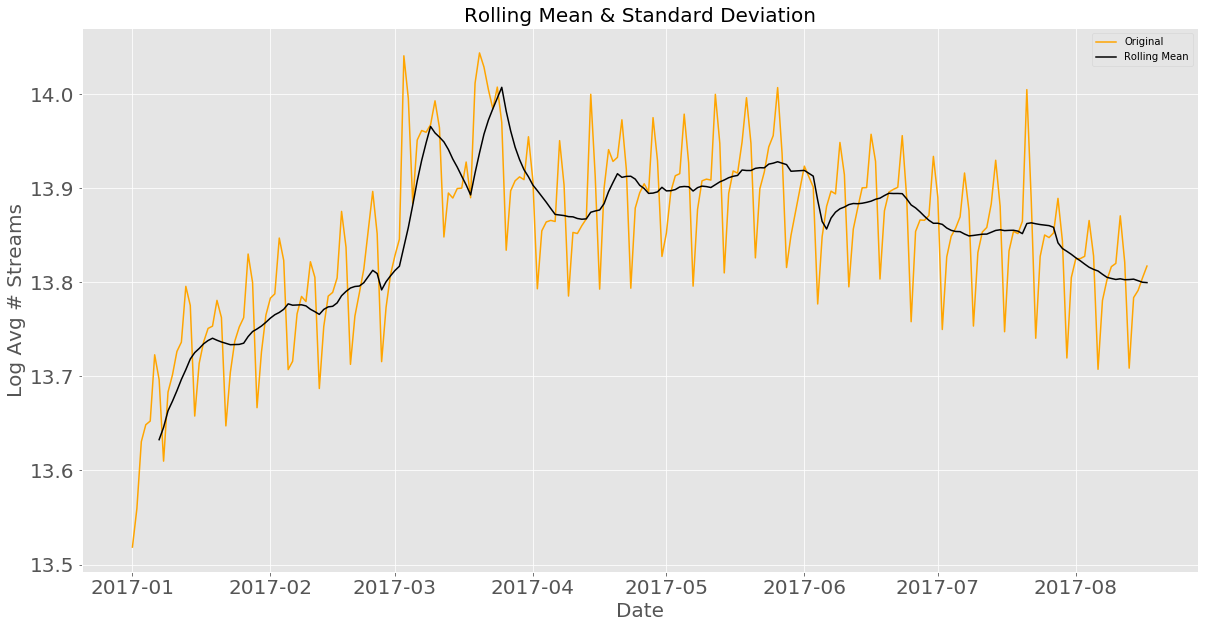

In [27]:
avg_streams_rolmean = test_stationarity(avg_streams_log, std=False)

### Time Series is not Stationary because Test Stat (-2.15) > Critical Values (10%)

In [28]:
print(avg_streams_log.iloc[30], '-', avg_streams_rolmean.iloc[30], '= avg_streams_mean_diff')
avg_streams_mean_diff = avg_streams_log - avg_streams_rolmean
avg_streams_mean_diff.head(30)

13.7652268801 - 13.7575289608 = avg_streams_mean_diff


Date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07    0.063803
2017-01-08   -0.035882
2017-01-09    0.019831
2017-01-10    0.028029
2017-01-11    0.041717
2017-01-12    0.039623
2017-01-13    0.088566
2017-01-14    0.057039
2017-01-15   -0.067442
2017-01-16   -0.015751
2017-01-17    0.001954
2017-01-18    0.012856
2017-01-19    0.012869
2017-01-20    0.042384
2017-01-21    0.026021
2017-01-22   -0.087718
2017-01-23   -0.029639
2017-01-24    0.003551
2017-01-25    0.018409
2017-01-26    0.027158
2017-01-27    0.087738
2017-01-28    0.052187
2017-01-29   -0.083691
2017-01-30   -0.027536
Name: avg_streams, dtype: float64

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -6.571198e+00
p-value                        7.928175e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


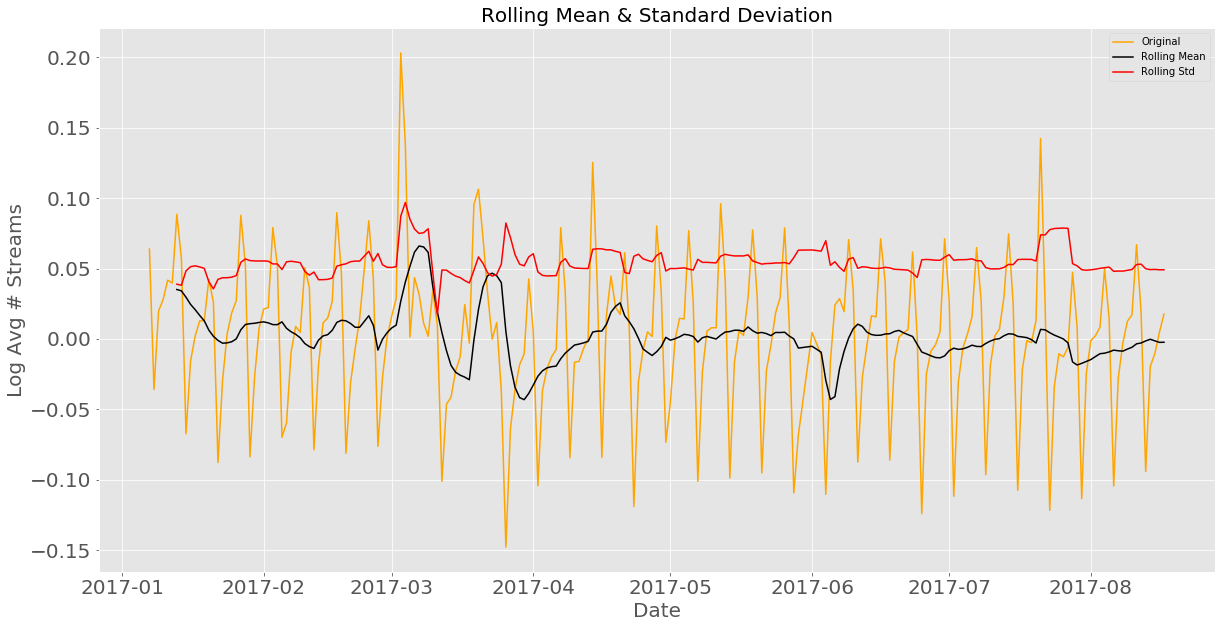

In [29]:
avg_streams_mean_diff.dropna(inplace=True)
stationary_avg_streams_rolmean = test_stationarity(avg_streams_mean_diff)
plt.savefig('../images/Rolling_Mean_avg_streams_mean_diff.png')

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


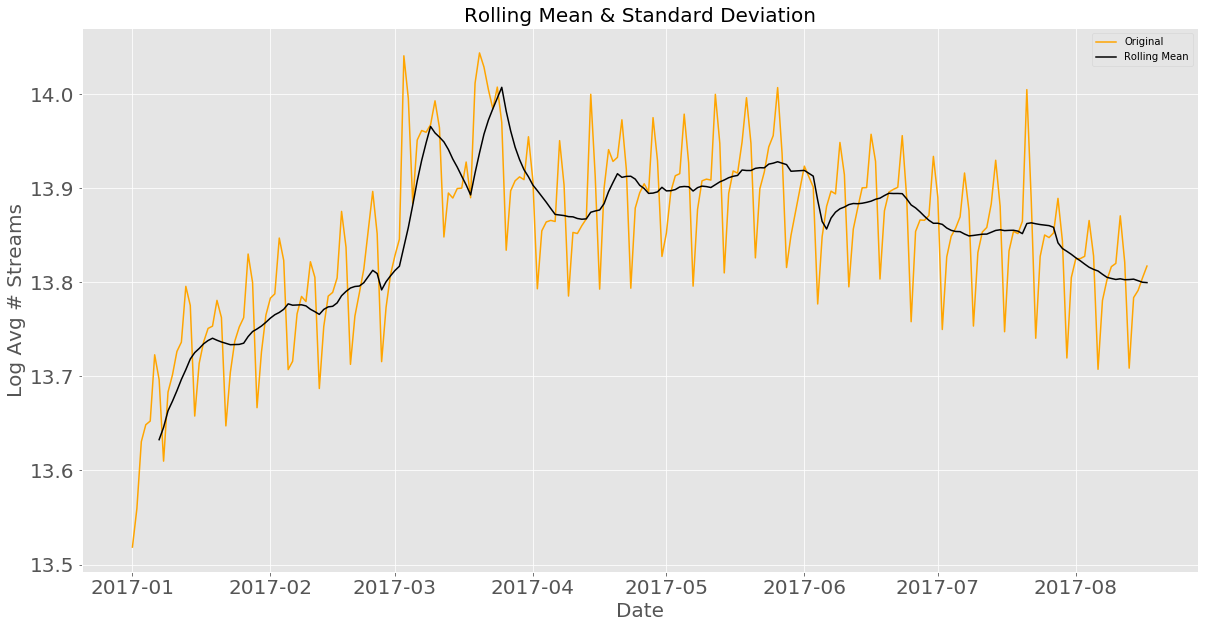

In [30]:
avg_streams_rolmean = test_stationarity(avg_streams_log, std=False)

### Time Series is Stationary with Confidence of 95% because Test Stat (-2.90) < -2.88

## #1 Song Streams

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -0.828937
p-value                          0.810474
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


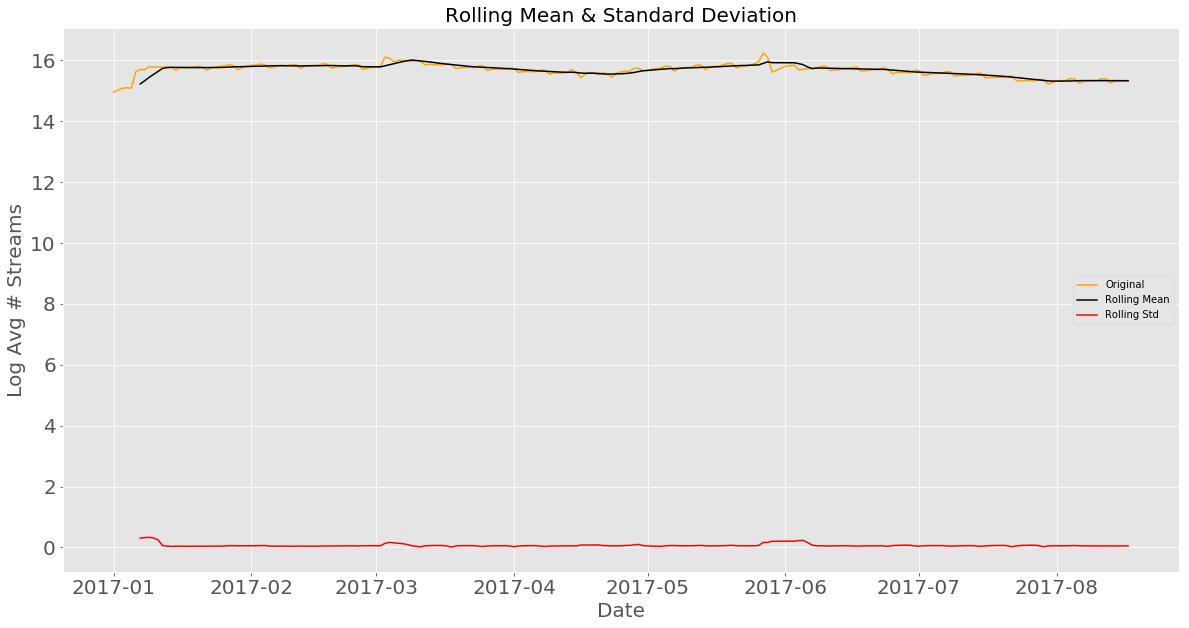

In [31]:
top_streams_log = np.log(timeseries_data['Streams_#1_song'])
top_streams_rolmean = test_stationarity(top_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -0.828937
p-value                          0.810474
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


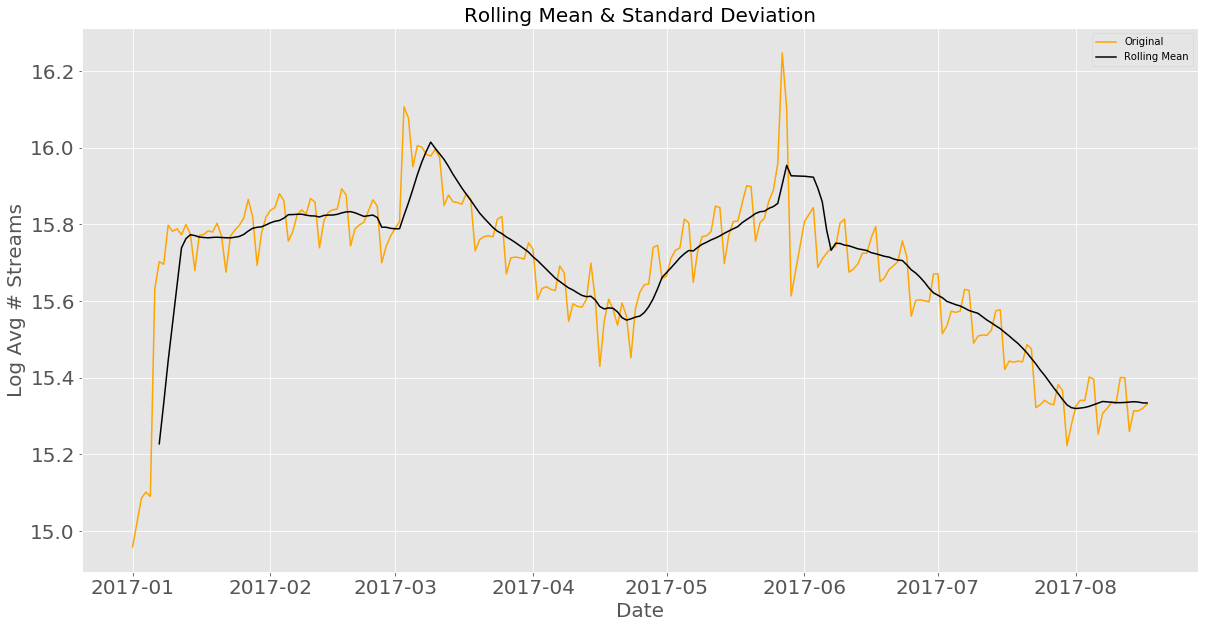

In [32]:
top_streams_rolmean = test_stationarity(top_streams_log, std=False)

### Time Series is not Stationary because Test Stat (-0.82) > Critical Values (10%)

In [33]:
print(top_streams_log.iloc[30], '-', top_streams_rolmean.iloc[30], '= top_streams_mean_diff')
top_streams_mean_diff = top_streams_log - top_streams_rolmean
top_streams_mean_diff.head(30)

15.819609558 - 15.7988050356 = top_streams_mean_diff


Date
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07    0.475194
2017-01-08    0.362962
2017-01-09    0.354050
2017-01-10    0.238636
2017-01-11    0.147217
2017-01-12    0.034001
2017-01-13    0.037086
2017-01-14    0.001488
2017-01-15   -0.091049
2017-01-16    0.004453
2017-01-17    0.007745
2017-01-18    0.017996
2017-01-19    0.014072
2017-01-20    0.036616
2017-01-21    0.003613
2017-01-22   -0.089789
2017-01-23    0.004711
2017-01-24    0.018597
2017-01-25    0.029094
2017-01-26    0.042733
2017-01-27    0.082316
2017-01-28    0.030044
2017-01-29   -0.099286
2017-01-30   -0.015074
Name: Streams_#1_song, dtype: float64

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -5.512086
p-value                          0.000002
#Lags Used                       7.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


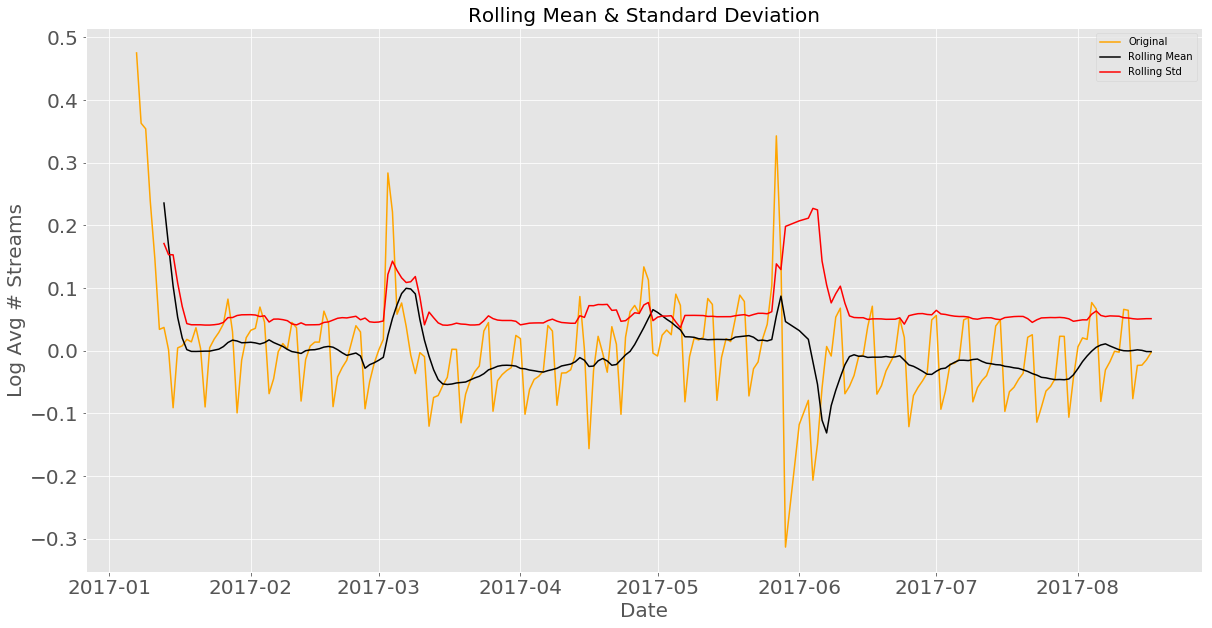

In [34]:
top_streams_mean_diff.dropna(inplace=True)
stationary_top_streams_rolmean = test_stationarity(top_streams_mean_diff)

### Time Series is Stationary with Confidence of 95% because Test Stat (-2.95) < -2.88

# Using Seasonal Decomposition to Increase Stationariness of Data

In [25]:
def seasonal_decomp(ts):
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(x=ts, freq=12)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fig,ax = plt.subplots(4)
    ax1,ax2,ax3,ax4 = ax

    ax1.plot(ts, label='Original', c='orange')
    ax1.legend(loc='best')

    ax2.plot(trend, label='Trend', c='blue')
    ax2.legend(loc='best')

    ax3.plot(seasonal,label='Seasonality', c='purple')
    ax3.legend(loc='best')

    ax4.plot(residual, label='Residuals',c ='red')
    ax4.legend(loc='best')

    fig.set_size_inches(30,20)
    bigger_fonts(ax1)
    bigger_fonts(ax2)
    bigger_fonts(ax3)
    bigger_fonts(ax4)
    return residual

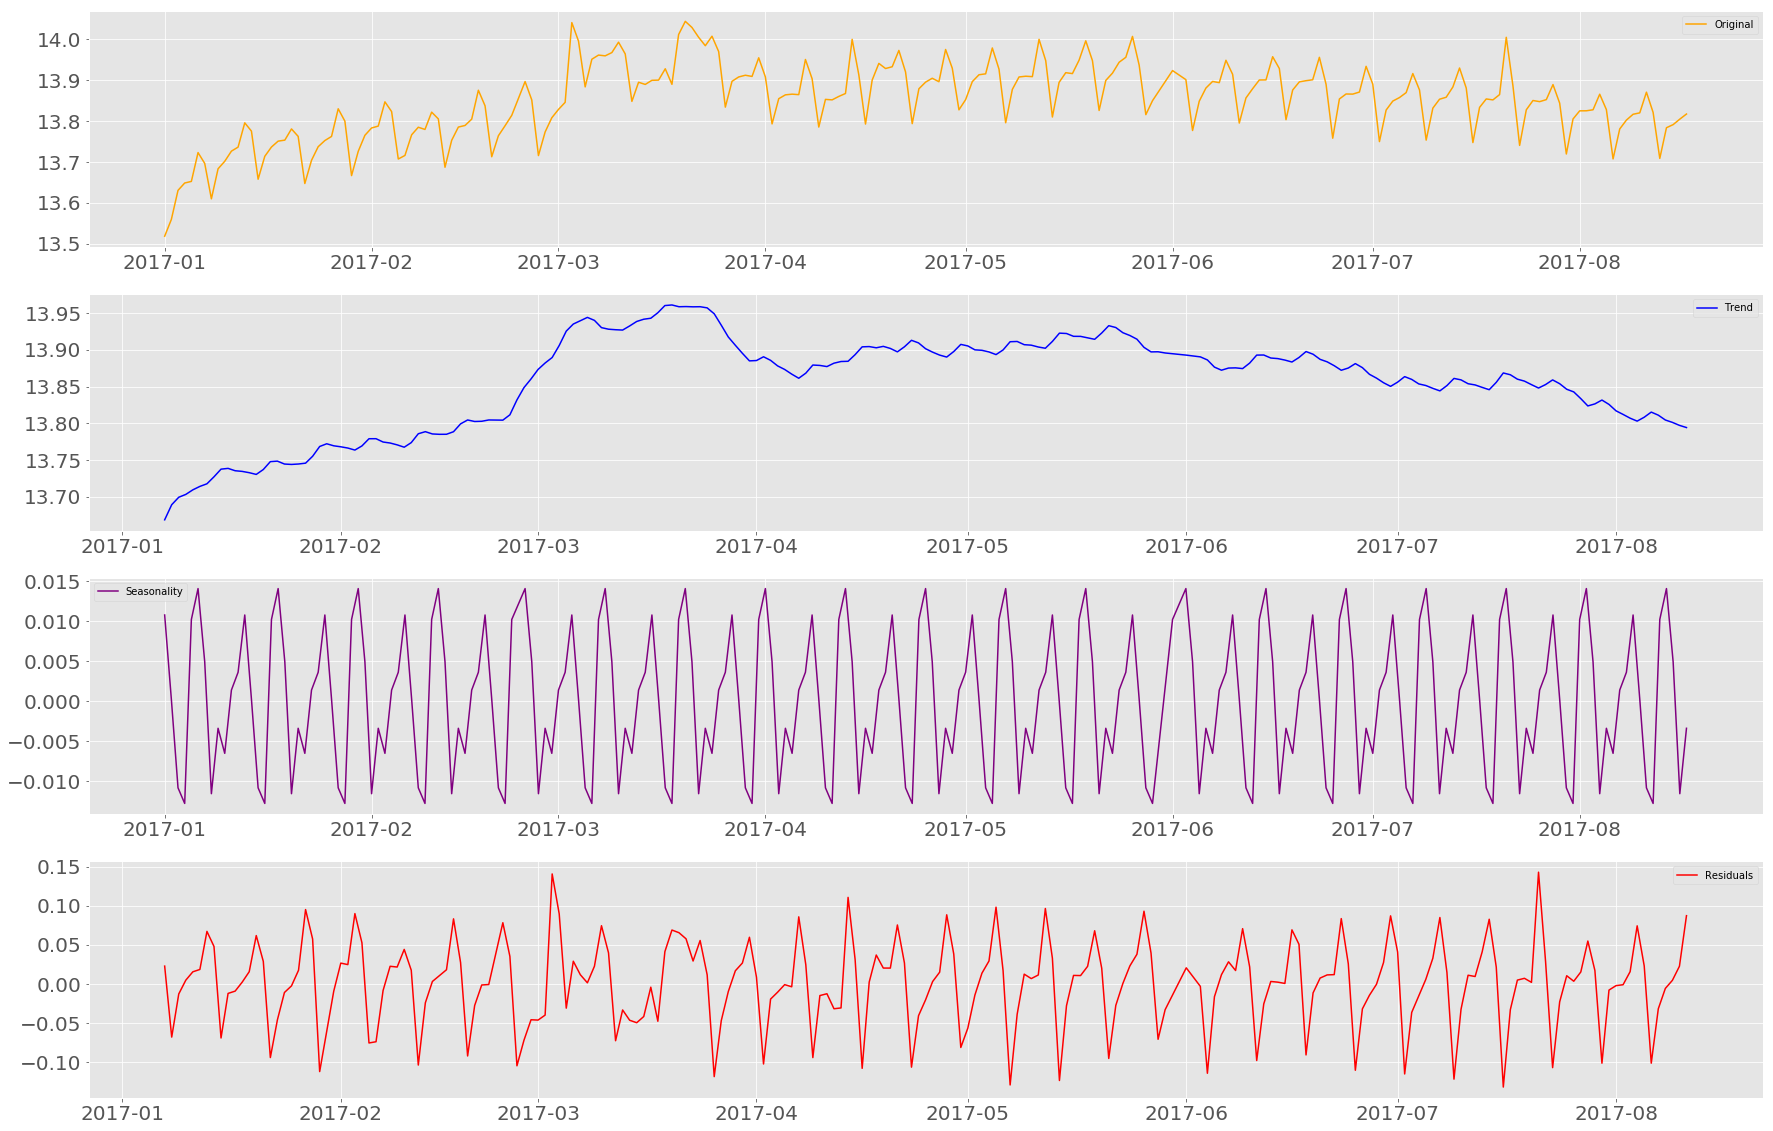

In [26]:
avg_stream_residuals = seasonal_decomp(avg_streams_log)
plt.savefig('../images/Seasonal_Decomp_avg_streams.png')

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -6.648665e+00
p-value                        5.187399e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


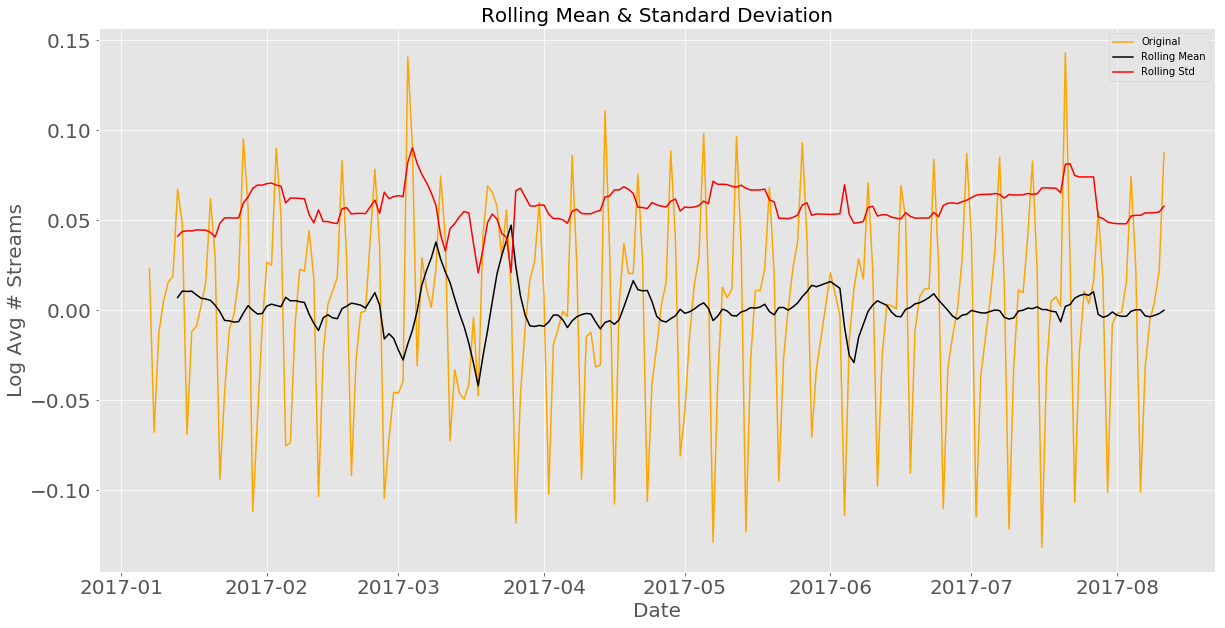

In [27]:
avg_stream_residuals.dropna(inplace=True)
x = test_stationarity(avg_stream_residuals)

### 99% Confidence TS is Stationary --> Test Stat < Critical Val at 1%

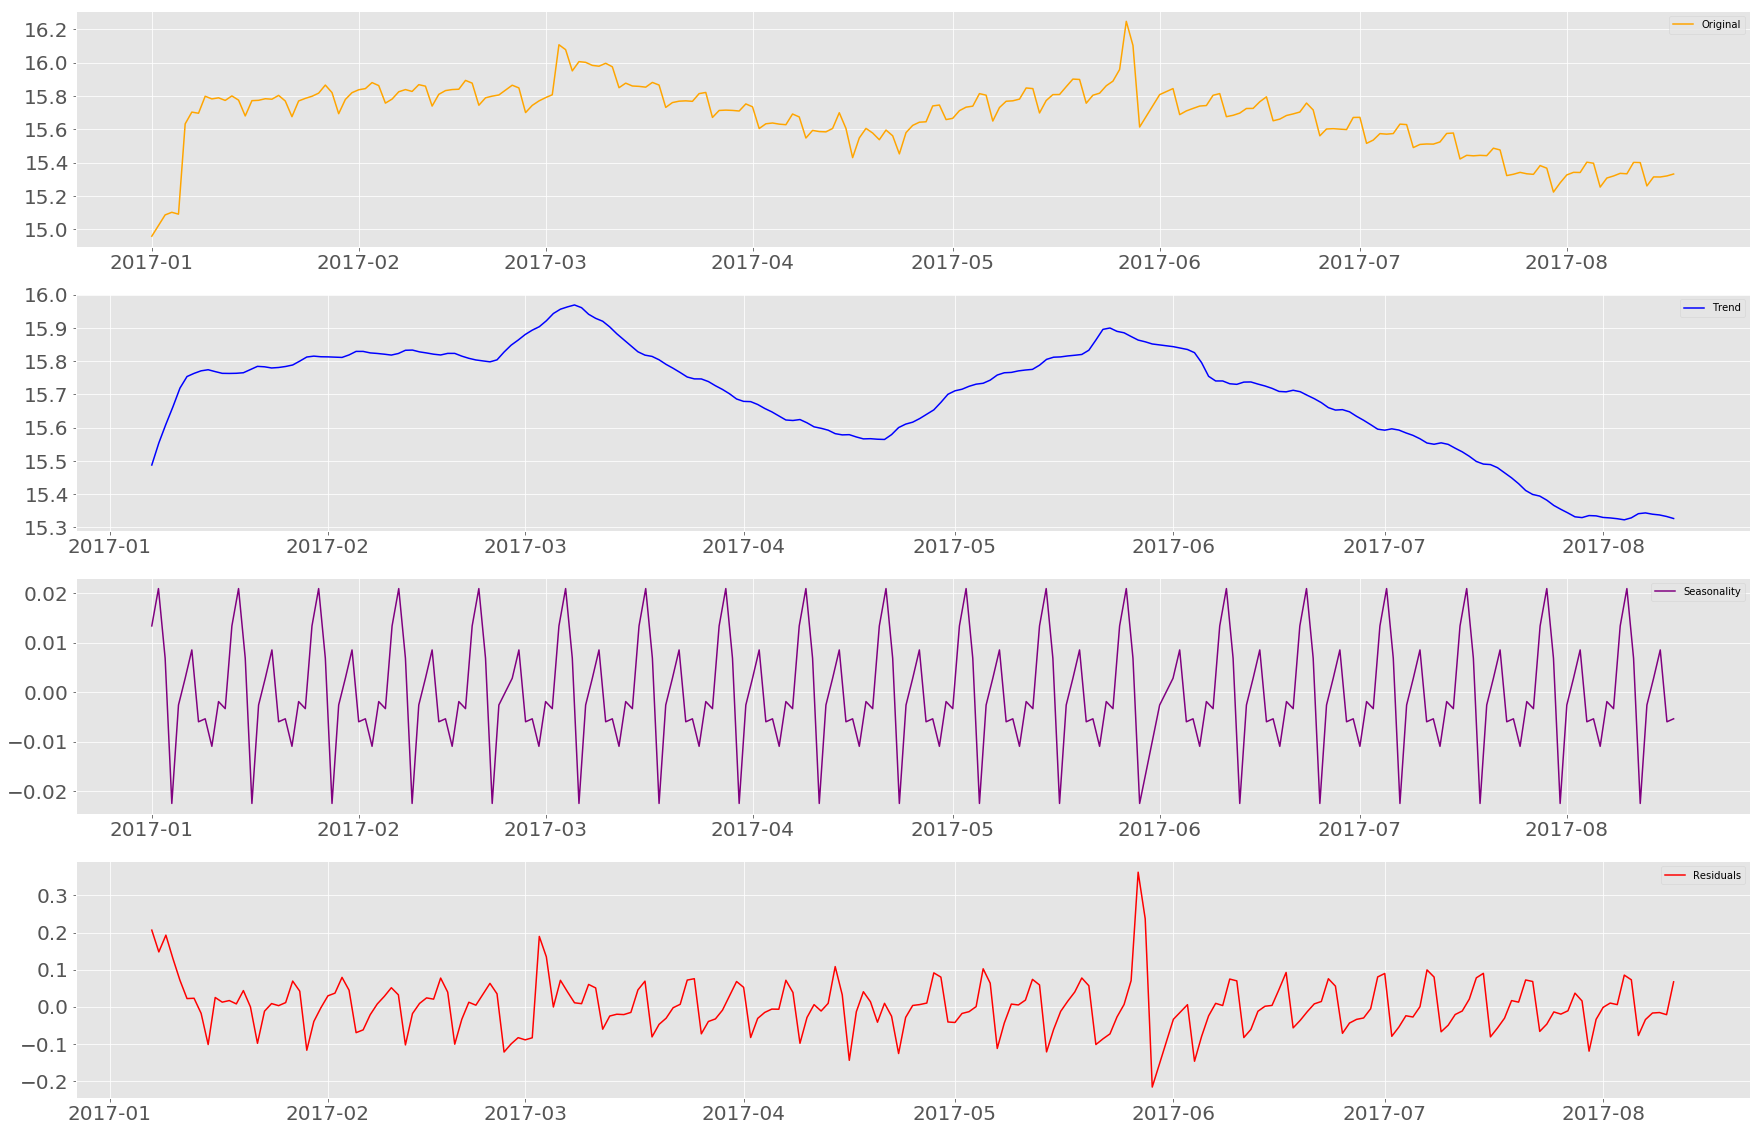

In [28]:
top_song_residuals = seasonal_decomp(top_streams_log)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -5.913650e+00
p-value                        2.603312e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.980000e+02
Critical Value (1%)           -3.463815e+00
Critical Value (5%)           -2.876251e+00
Critical Value (10%)          -2.574611e+00
dtype: float64


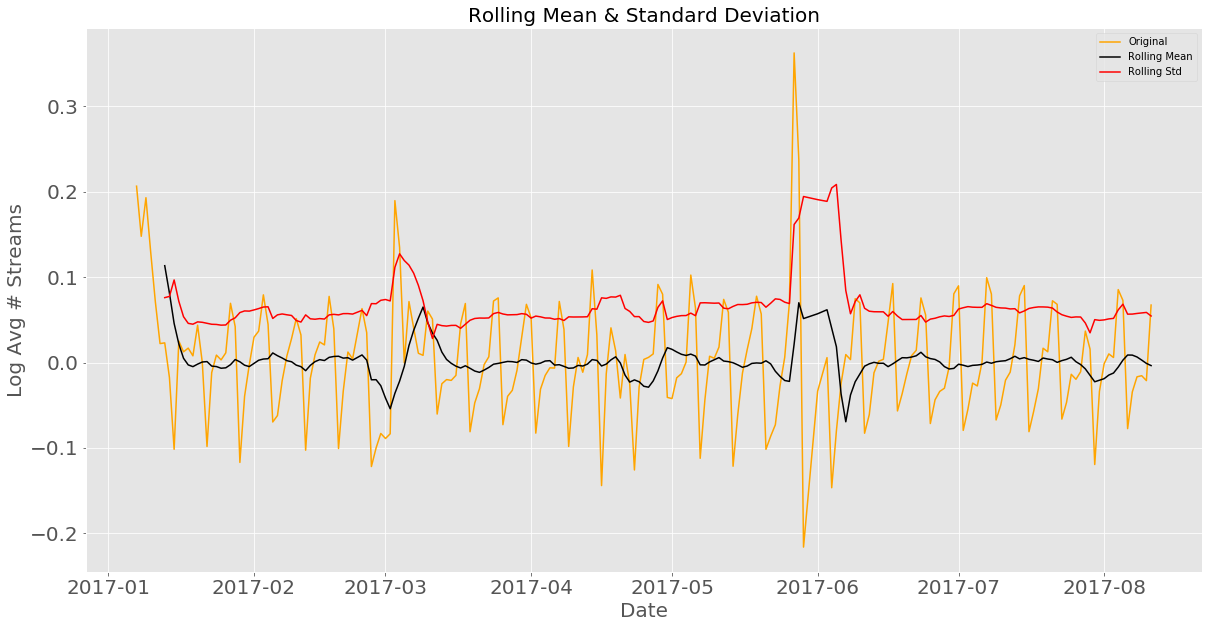

In [29]:
top_song_residuals.dropna(inplace=True)
y = test_stationarity(top_song_residuals)

### 99% Confidence TS is Stationary --> Test Stat < Critical Val at 1%

# ARIMA models

## Average Streams ARIMA model

In [35]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
def ARIMA_model(df, p, q):
    model = ARIMA(df, order=(p, 1, q))  
    results_ARIMA = model.fit(disp=0)
    predictions_ARIMA = results_ARIMA.predict()
    return model, predictions_ARIMA

def transforming_predictions(col_log, ARIMA_predictions):
    predictions_ARIMA_log = pd.Series(col_log.iloc[0], index=col_log.index)
    predictions_ARIMA_log = predictions_ARIMA_log.add(ARIMA_predictions.cumsum(),fill_value=0)
    predictions_ARIMA = np.exp(predictions_ARIMA_log)
    return predictions_ARIMA

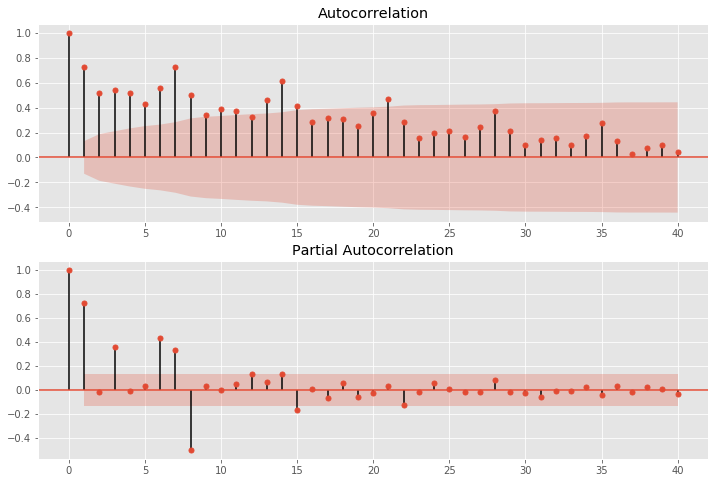

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(avg_streams_log, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(avg_streams_log, lags=40, ax=ax2)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 0.7770201219379209


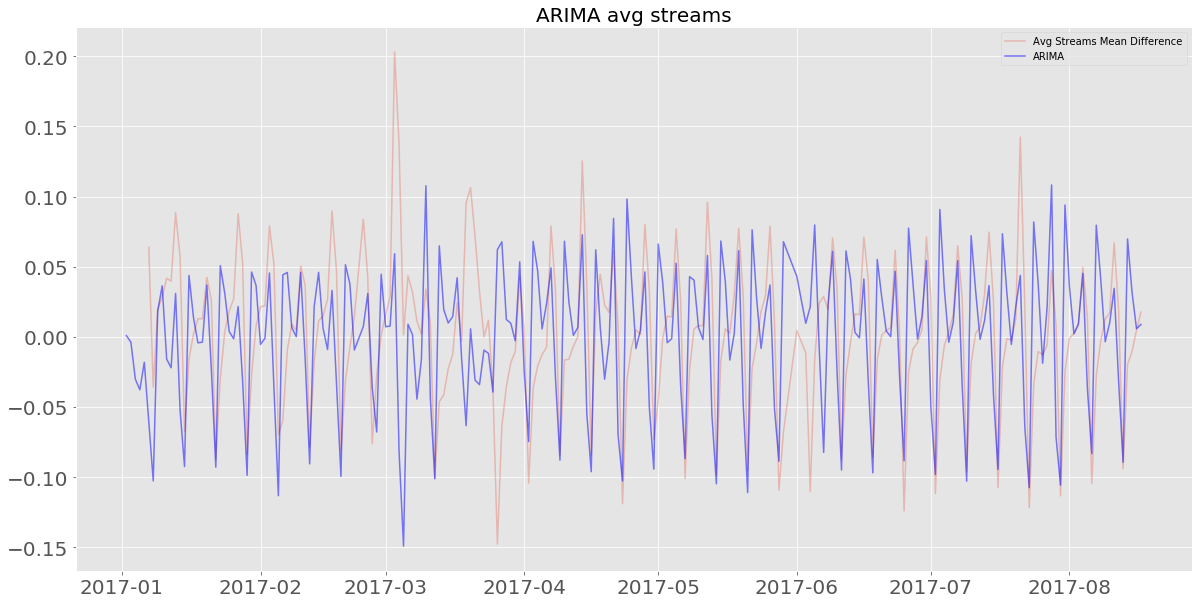

In [64]:
avg_streams_model, avg_streams_predictions_ARIMA = ARIMA_model(avg_streams_log,9,2)

fig, ax = plt.subplots(1)
ax.plot(avg_streams_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(avg_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA avg streams')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)
plt.savefig('../images/ARIMA_model_stationary_avg_streams.png')


print('RSS: {}' .format(((avg_streams_predictions_ARIMA - avg_streams_mean_diff)**2).sum()))

In [65]:
avg_streams_predictions_ARIMA.head()

Date
2017-01-02    0.000821
2017-01-03   -0.003917
2017-01-04   -0.030238
2017-01-05   -0.037743
2017-01-06   -0.018136
dtype: float64

In [66]:
 avg_streams_predictions_ARIMA.cumsum().head(10)

Date
2017-01-02    0.000821
2017-01-03   -0.003095
2017-01-04   -0.033333
2017-01-05   -0.071076
2017-01-06   -0.089212
2017-01-07   -0.149504
2017-01-08   -0.252244
2017-01-09   -0.233977
2017-01-10   -0.197662
2017-01-11   -0.213527
dtype: float64

RMSE: 507247.57


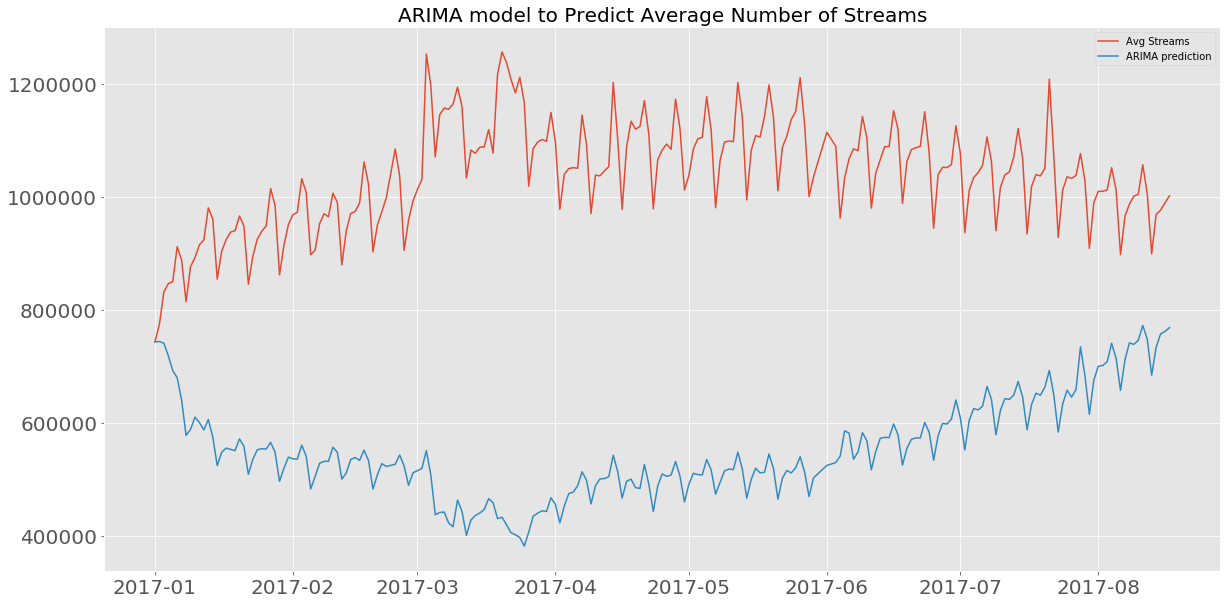

In [67]:
avg_predictions_ARIMA = transforming_predictions(avg_streams_log, avg_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(timeseries_data['avg_streams'], label='Avg Streams')
ax.plot(avg_predictions_ARIMA, label='ARIMA prediction')
plt.title('ARIMA model to Predict Average Number of Streams')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
plt.savefig('../images/ARIMA_model_to_Predict_Average_Number_of_Streams.png')
print('RMSE: %.2f'% np.sqrt(sum((avg_predictions_ARIMA-timeseries_data['avg_streams'])**2)/len(timeseries_data['avg_streams'])))

## Top Streams ARIMA model

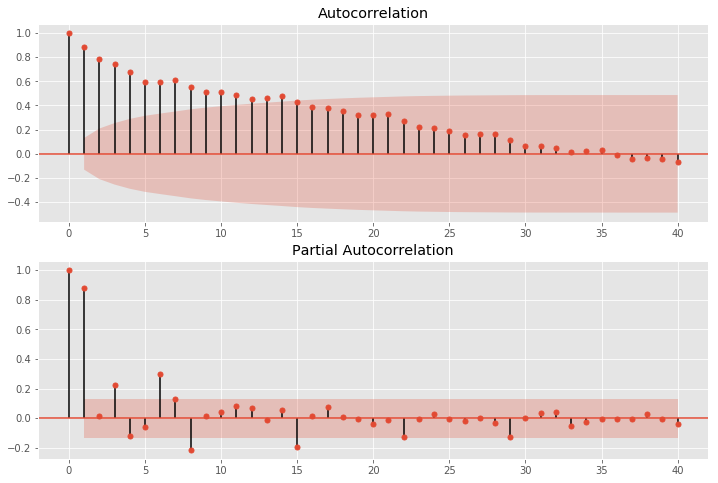

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(top_streams_log, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(top_streams_log, lags=40, ax=ax2)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 1.953395645584961


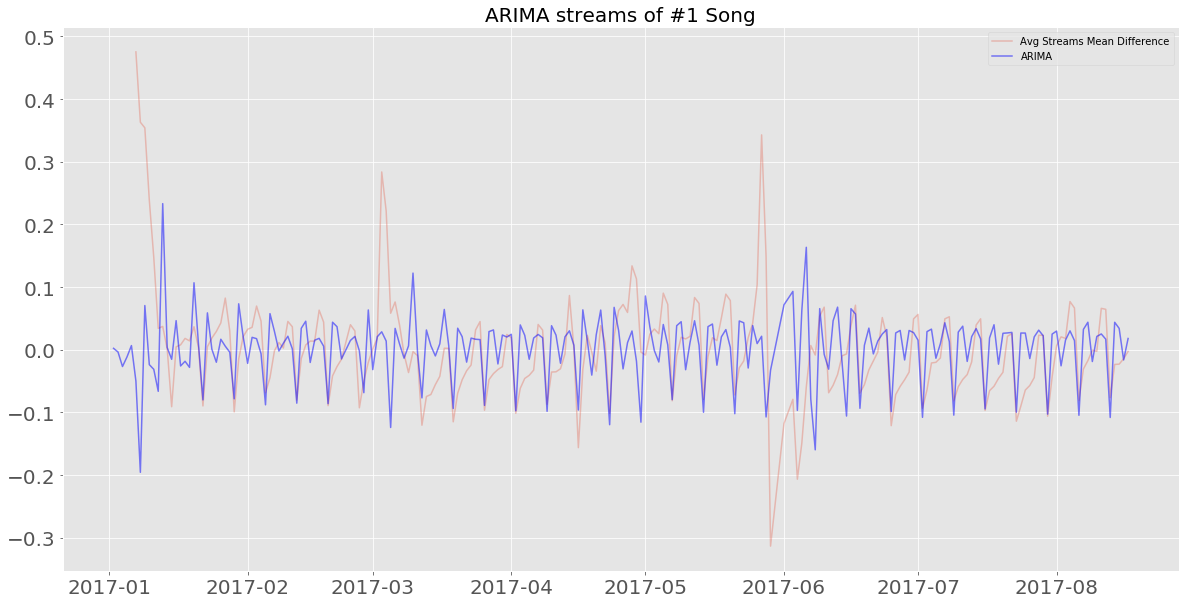

In [54]:
top_streams_model, top_streams_predictions_ARIMA = ARIMA_model(top_streams_log,15,2)

fig, ax = plt.subplots(1)
ax.plot(top_streams_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(top_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA streams of #1 Song')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)

print('RSS: {}' .format(((top_streams_predictions_ARIMA - top_streams_mean_diff)**2).sum()))

RMSE: 3335203.99


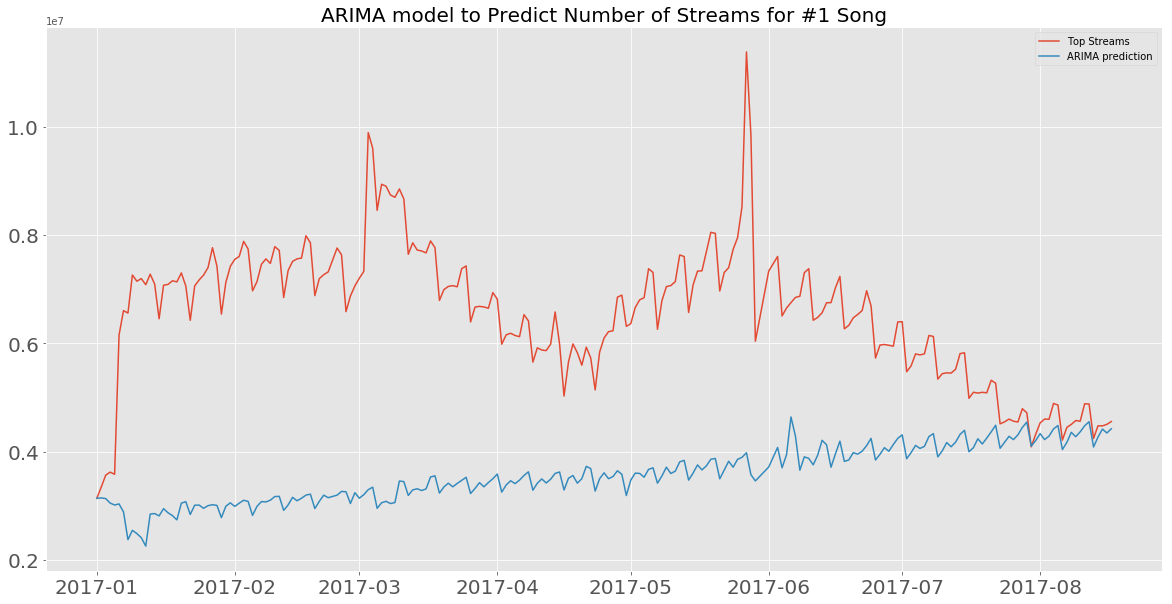

In [55]:
top_streams_predictions = transforming_predictions(top_streams_log, top_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(timeseries_data['Streams_#1_song'], label='Top Streams')
ax.plot(top_streams_predictions, label='ARIMA prediction')
plt.title('ARIMA model to Predict Number of Streams for #1 Song')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
print('RMSE: %.2f'% np.sqrt(sum((top_streams_predictions-timeseries_data['Streams_#1_song'])**2)/len(timeseries_data['Streams_#1_song'])))

## Total Streams ARIMA model

In [46]:
spotify_global_df = spotify_df[spotify_df['Region']=='global']

In [47]:
spotify_total_streams = spotify_global_df.groupby('Date').sum()['Streams'].reset_index()
spotify_total_streams.set_index('Date', inplace=True)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                  -2.153572
p-value                          0.223525
#Lags Used                      14.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


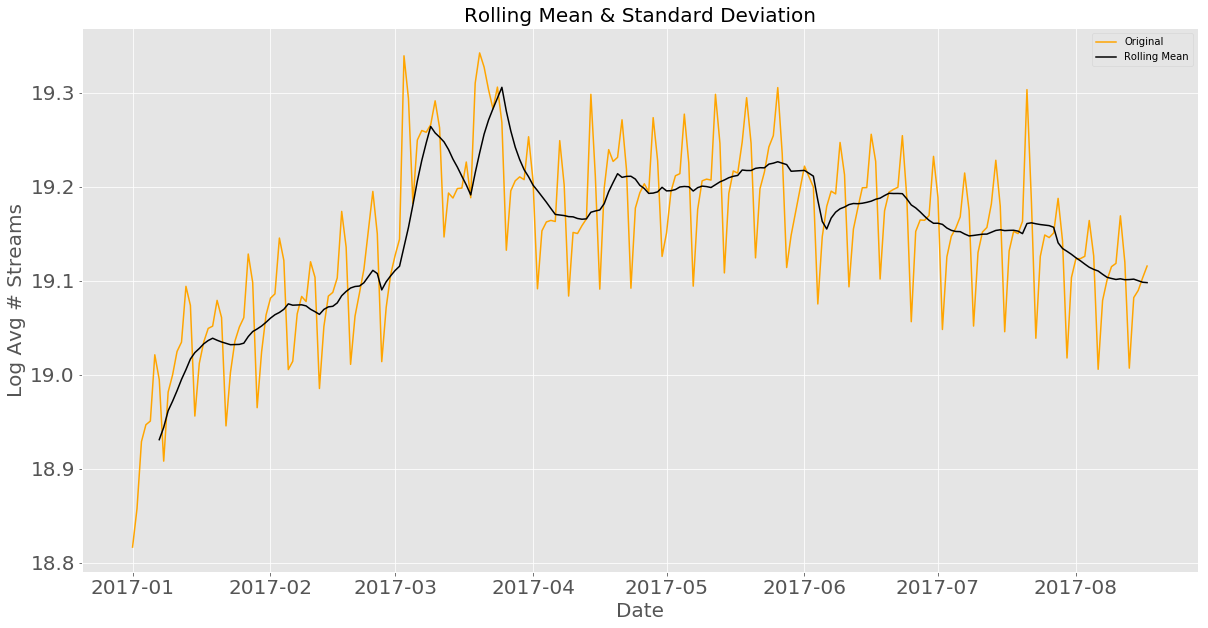

In [48]:
spotify_total_streams_log = np.log(spotify_total_streams['Streams'])
spotify_total_streams_rolmean = test_stationarity(spotify_total_streams_log, std=False)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
/Users/gmgtex/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


Results of Dickey-Fuller Test:
Test Statistic                -6.571198e+00
p-value                        7.928175e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.110000e+02
Critical Value (1%)           -3.461727e+00
Critical Value (5%)           -2.875337e+00
Critical Value (10%)          -2.574124e+00
dtype: float64


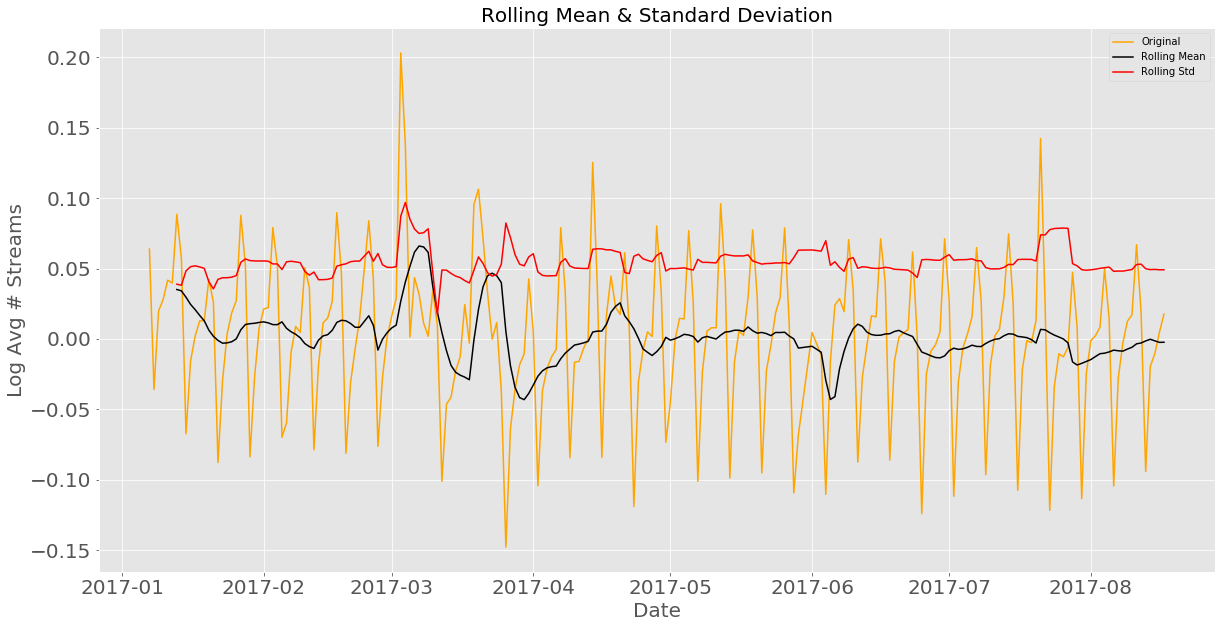

In [49]:
spotify_total_streams_log_mean_diff = spotify_total_streams_log - spotify_total_streams_rolmean
spotify_total_streams_log_mean_diff.dropna(inplace=True)
spotify_total_streams_rolmean = test_stationarity(spotify_total_streams_log_mean_diff)

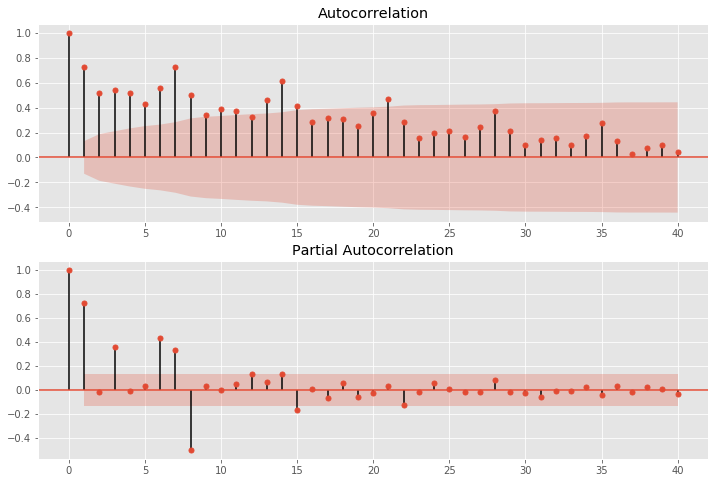

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(spotify_total_streams_log, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spotify_total_streams_log, lags=40, ax=ax2)

/Users/gmgtex/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS: 0.777412168925998


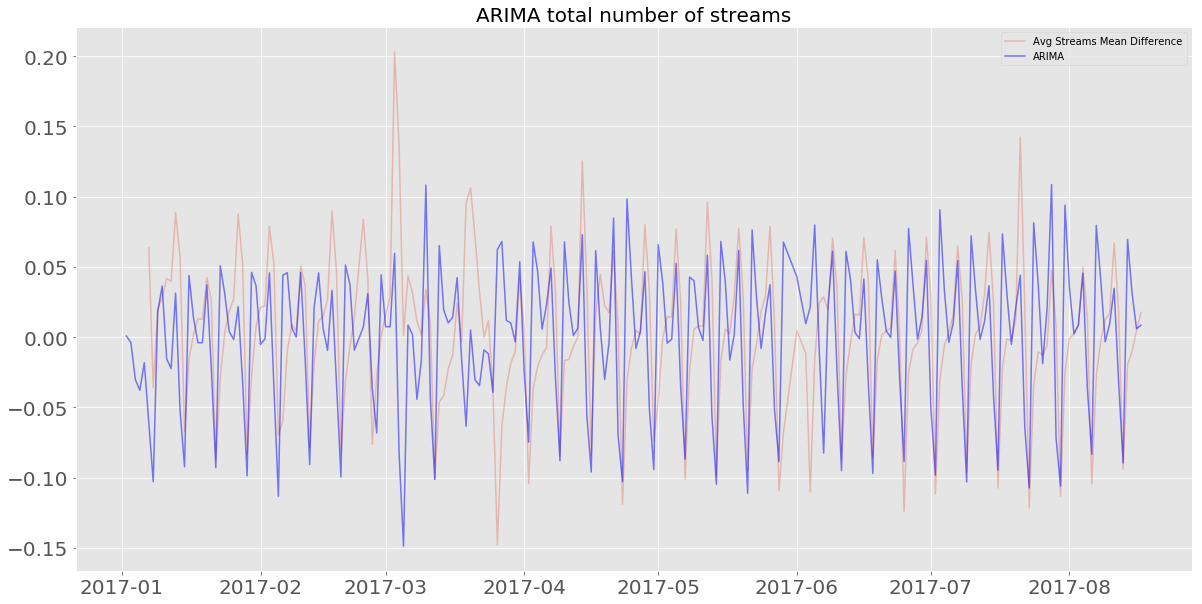

In [69]:
total_streams_model, total_streams_predictions_ARIMA = ARIMA_model(spotify_total_streams_log,9,2)

fig, ax = plt.subplots(1)
ax.plot(spotify_total_streams_log_mean_diff, label='Avg Streams Mean Difference', alpha=0.3)
ax.plot(total_streams_predictions_ARIMA, color='blue', alpha=0.5, label='ARIMA')
plt.title('ARIMA total number of streams')
plt.legend(loc='best')
fig.set_size_inches(20,10)
bigger_fonts(ax)

print('RSS: {}' .format(((total_streams_predictions_ARIMA - spotify_total_streams_log_mean_diff)**2).sum()))

RMSE: 101768034.36


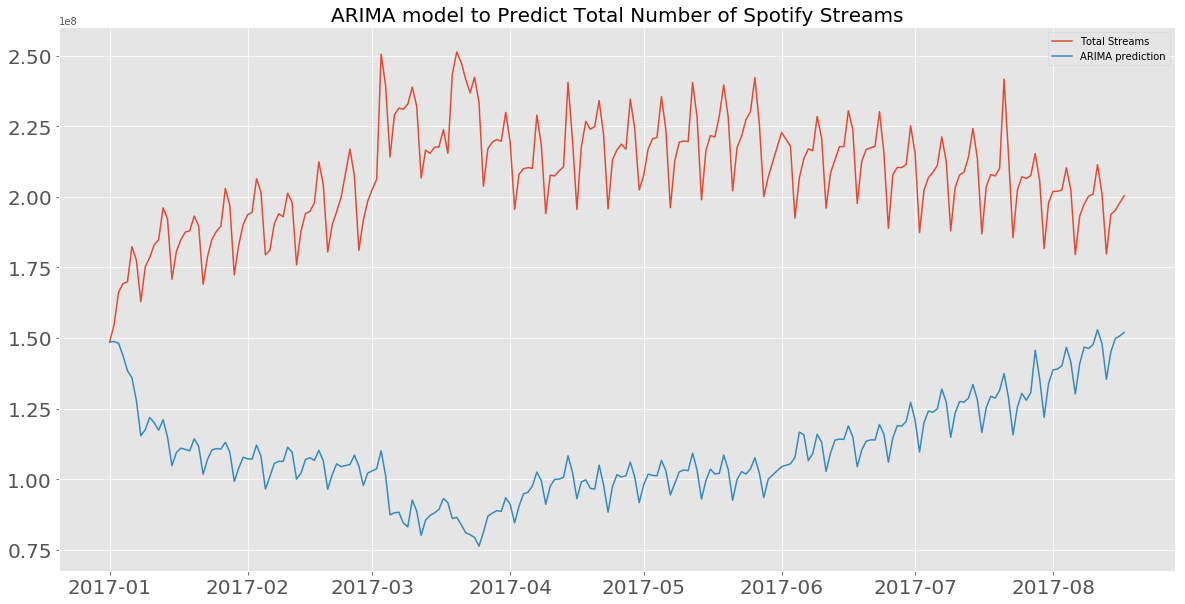

In [70]:
total_streams_predictions = transforming_predictions(spotify_total_streams_log, total_streams_predictions_ARIMA)

fig, ax = plt.subplots(1)
ax.plot(spotify_total_streams['Streams'], label='Total Streams')
ax.plot(total_streams_predictions, label='ARIMA prediction')
plt.title('ARIMA model to Predict Total Number of Spotify Streams')
plt.legend(loc='best')
bigger_fonts(ax)
fig.set_size_inches((20,10))
print('RMSE: %.2f'% np.sqrt(sum((total_streams_predictions-spotify_total_streams['Streams'])**2)/len(spotify_total_streams['Streams'])))

# Conclusions & Future Directions
We can see that ARIMA models are able to capture the weekly trends in number of daily Spotify streams. Number of daily streams are lowest on Sundays and grow gradually throughout the week, peaking on Fridays.  
However, the ARIMA models not very good at forecasting monthly trends of daily number of Spotify streams. Since, this data is only for an 8 month period, the ARIMA models are having a tough time forecasting the monthly underlying signal. A longer period of data would allow the ARIMA models to better capture this signal.  
Some future directions for this project would be to try LSTM neural net to improve the predictions of number of daily streams on Spotify.